In [1]:
# correct survey data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def pcoord(x, y):
    """
    Convert x, y to polar coordinates r, az (geographic convention)
    r,az = pcoord(x, y)
    """
    r = np.sqrt(x**2 + y**2)
    az = np.degrees(np.arctan2(x, y))
    # az[where(az<0.)[0]] += 360.
    az = (az+360.)%360.
    return r, az

def xycoord(r, az):
    """
    Convert r, az [degrees, geographic convention] to rectangular coordinates
    x,y = xycoord(r, az)
    """
    x = r * np.sin(np.radians(az))
    y = r * np.cos(np.radians(az))
    return x, y


### Check corrections against the two points Jin-Si re-shot after correcting the pole height

In [3]:
df = pd.read_csv( './2025-11-04/duplicates.csv' )
df

,Name,Easting,Northing,Elevation,E new,N new,distance to shift,Vertical shift,New elevation,Tilt angle,...,Longitude,Latitude,Ellipsoidal height,Antenna height (m),Easting RMS,Northing RMS,Elevation RMS,Lateral RMS,PDOP,GDOP
0,22,420113.404,4638437.056,3.393,420113.101,4638436.661,0.498,1.678,1.715,16.3,...,-69.963005,41.893833,-24.405,0.134,0.010,0.010,0.010,0.014,1.1,1.3
1,26,420112.947,4638437.252,1.710,NaN,NaN,NaN,NaN,NaN,13.8,...,-69.963010,41.893835,-26.088,1.884,0.014,0.014,0.015,0.019,1.1,1.3
2,21,420125.548,4638442.370,2.049,420125.728,4638442.135,0.296,1.725,0.324,9.5,...,-69.962859,41.893882,-25.749,0.134,0.010,0.010,0.010,0.014,1.1,1.3
3,25,420125.724,4638442.134,0.315,NaN,NaN,NaN,NaN,NaN,9.5,...,-69.962857,41.893880,-27.483,1.884,0.013,0.013,0.013,0.018,1.1,1.3


Delta z 1.679659260956577
Delta xy 0.49116674061137866
Correct z:  1.71 CRS z: 1.7133407390434228 JRO z 1.715


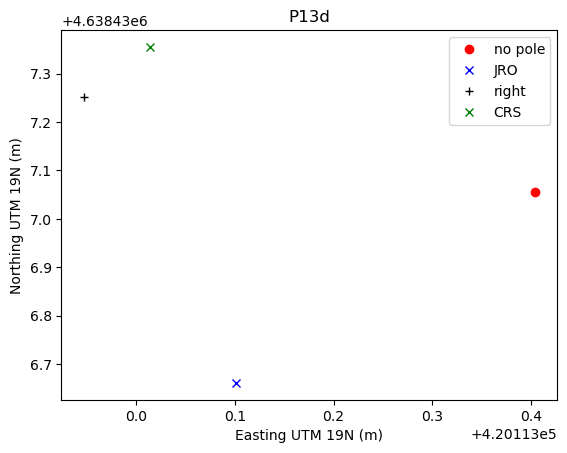

In [4]:
# Calculate the vertical shift, assuming prior elevation was calculated using antenna height (ah) of 0.134
# and new antenna height = pole length (p) plus antenna height
ah = 0.134
p = 1.75

tilt13dnp = df['Tilt angle'].iloc[0]
az13dnp = df['Tilt Azimuth'].iloc[0]
z13dnp = df['Elevation'].iloc[0]
x13dnp = df['Easting'].iloc[0]
y13dnp = df['Northing'].iloc[0]
x13dc = df['E new'].iloc[0]
y13dc = df['N new'].iloc[0]
z13dc = df['New elevation'].iloc[0]

x13d = df['Easting'].iloc[1]
y13d = df['Northing'].iloc[1]
z13d = df['Elevation'].iloc[1]

# CRS elevation correction
dz13dnp = (p + ah) * np.cos( np.radians(tilt13dnp) ) - ah * np.cos( np.radians(tilt13dnp ) )
dxy13dnp = (p + ah) * np.sin( np.radians(tilt13dnp) ) - ah * np.sin( np.radians(tilt13dnp ) )
dx13dnp, dy13dnp = xycoord( dxy13dnp, az13dnp-90 )
print('Delta z', dz13dnp)
print('Delta xy', dxy13dnp)
z13dCRS = z13dnp - dz13dnp
print('Correct z: ', z13d, 'CRS z:', z13dCRS, 'JRO z', z13dc )
x13dCRS = x13dnp+dx13dnp
y13dCRS = y13dnp+dy13dnp

plt.plot( x13dnp, y13dnp, 'or', label='no pole' )
plt.plot( x13dc, y13dc, 'xb', label='JRO' )
plt.plot( x13d, y13d, '+k', label='right' )
plt.plot( x13dCRS, y13dCRS, 'xg', label='CRS' )
plt.xlabel('Easting UTM 19N (m)')
plt.ylabel('Northing UTM 19N (m)')
plt.legend()
plt.title('P13d')
plt.show()

Delta z 1.7259998026901548
Delta xy 0.28883331025618586
Correct z:  0.315 CRS z: 0.3230001973098451 JRO z 0.324


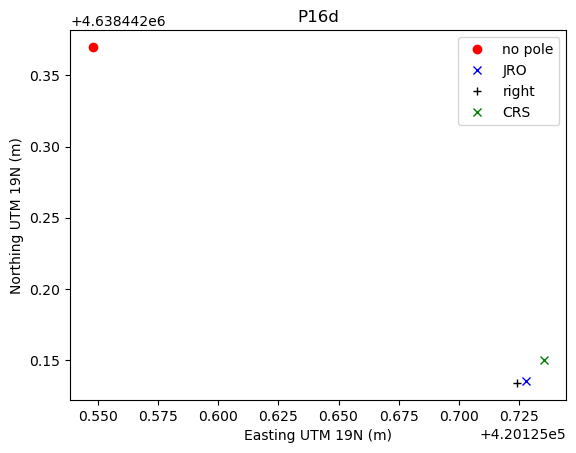

In [5]:
tilt16dnp = df['Tilt angle'].iloc[2]
az16dnp = df['Tilt Azimuth'].iloc[2]
z16dnp = df['Elevation'].iloc[2]

x16dnp = df['Easting'].iloc[2]
y16dnp = df['Northing'].iloc[2]
x16dc = df['E new'].iloc[2]
y16dc = df['N new'].iloc[2]
z16dc = df['New elevation'].iloc[2]

x16d = df['Easting'].iloc[3]
y16d = df['Northing'].iloc[3]
z16d = df['Elevation'].iloc[3]


# CRS elevation correction
dz16dnp = (p + ah) * np.cos( np.radians(tilt16dnp) ) - ah * np.cos( np.radians(tilt16dnp ) )
dxy16dnp = (p + ah) * np.sin( np.radians(tilt16dnp) ) - ah * np.sin( np.radians(tilt16dnp ) )
dx16dnp, dy16dnp = xycoord( dxy16dnp, az16dnp-90 )
print('Delta z', dz16dnp)
print('Delta xy', dxy16dnp)
z16dCRS = z16dnp - dz16dnp
print('Correct z: ', z16d, 'CRS z:', z16dCRS, 'JRO z', z16dc )
x16dCRS = x16dnp+dx16dnp
y16dCRS = y16dnp+dy16dnp

plt.plot( x16dnp, y16dnp, 'or', label='no pole' )
plt.plot( x16dc, y16dc, 'xb', label='JRO' )
plt.plot( x16d, y16d, '+k', label='right' )
plt.plot( x16dCRS, y16dCRS, 'xg', label='CRS' )
plt.xlabel('Easting UTM 19N (m)')
plt.ylabel('Northing UTM 19N (m)')
plt.title('P16d')
plt.legend()
plt.show()

In [6]:
print( x16dc, y16dc )
print( x16d, y16d )

420125.728 4638442.135
420125.724 4638442.134


In [7]:
df = pd.read_csv( './2025-11-04/2025-11-04_Marconi_Extrinsic_Targets.csv' )
df

,Name,Easting,Northing,Elevation,E new,N new,distance to shift,Vertical shift,New elevation,Tilt angle,...,Longitude,Latitude,Ellipsoidal height,Antenna height (m),Easting RMS,Northing RMS,Elevation RMS,Lateral RMS,PDOP,GDOP
0,RM1,419995.600,4638156.078,12.477,NaN,NaN,NaN,NaN,NaN,NaN,...,-69.964386,41.891291,-15.323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RM2,420067.695,4638142.521,13.076,NaN,NaN,NaN,NaN,NaN,NaN,...,-69.963516,41.891176,-14.725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RM2_stkd,420067.675,4638142.522,13.070,NaN,NaN,NaN,NaN,NaN,2.7,...,-69.963516,41.891176,-14.731,1.884,0.012,0.012,0.011,0.017,1.2,1.4
3,canera middle bar,420087.125,4638326.188,19.042,NaN,NaN,NaN,NaN,NaN,2.6,...,-69.963306,41.892832,-8.757,0.134,0.010,0.010,0.010,0.014,1.0,1.2
4,1,420126.507,4638334.081,3.921,420126.341,4638334.161,0.184,1.743,2.178,5.8,...,-69.962833,41.892907,-23.878,0.134,0.010,0.010,0.010,0.014,1.1,1.2
5,2,420112.440,4638324.489,5.344,420112.882,4638324.434,0.445,1.692,3.652,14.5,...,-69.963001,41.892819,-22.456,0.134,0.010,0.010,0.010,0.014,1.1,1.2
6,3,420109.507,4638334.549,5.379,420109.174,4638334.392,0.368,1.711,3.668,11.9,...,-69.963038,41.892910,-22.420,0.134,0.010,0.010,0.010,0.014,1.1,1.2
7,4,420114.781,4638337.505,4.869,420114.781,4638337.505,0.000,1.750,3.119,0.3,...,-69.962975,41.892937,-22.930,0.134,0.010,0.010,0.010,0.014,1.1,1.2
8,5,420132.564,4638345.397,3.695,420132.920,4638345.399,0.356,1.710,1.985,11.5,...,-69.962761,41.893010,-24.104,0.134,0.010,0.010,0.010,0.014,1.1,1.2
9,6,420151.193,4638332.699,1.749,420144.542,4638358.869,0.383,1.705,0.044,12.4,...,-69.962535,41.892897,-26.050,0.134,0.010,0.010,0.010,0.014,1.1,1.2


Mean difference (JRO - CRS):  -0.0020327803562859327 m


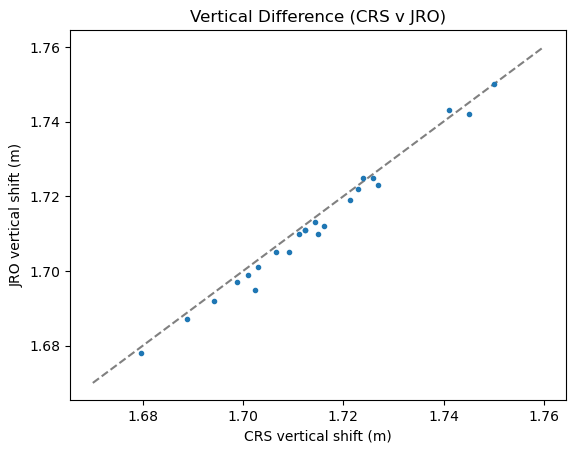

In [8]:
# Calculate the vertical shift, assuming prior elevation was calculated using antenna height (ah) of 0.134
# and new antenna height = pole length (p) plus antenna height
ah = 0.134
p = 1.75
df['vshift_CRS'] = (p + ah) * np.cos( np.radians (df['Tilt angle']) ) - ah * np.cos( np.radians( df['Tilt angle'] ) )
vshift_mean = np.nanmean( df['Vertical shift'] -  df['vshift_CRS'] )
print('Mean difference (JRO - CRS): ', vshift_mean, 'm')
plt.plot( [1.67, 1.76],  [1.67, 1.76], '--', c='gray')
plt.plot(df['vshift_CRS'],df['Vertical shift'],'.')
plt.xlabel( 'CRS vertical shift (m)')
plt.ylabel( 'JRO vertical shift (m)')
plt.title('Vertical Difference (CRS v JRO)')
plt.show()

Mean difference (JRO - CRS):  0.006457534476529066 m


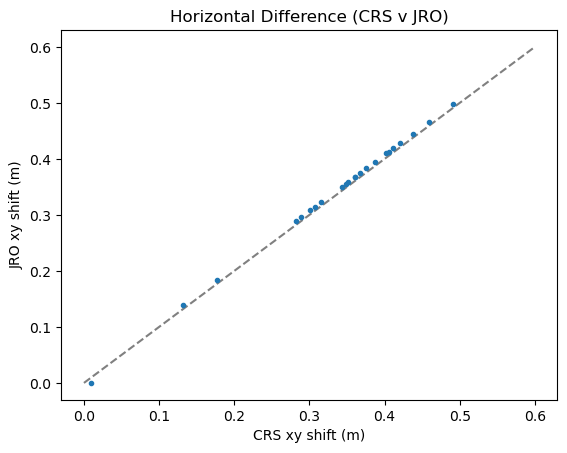

In [9]:
# Calculate the horizontal shift, assuming prior offset was calculated using antenna height (ah) of 0.134
# and new antenna height = pole length (p) plus antenna height
df['hshift_CRS'] = (p + ah) * np.sin( np.radians (df['Tilt angle']) ) - ah * np.sin( np.radians( df['Tilt angle'] ) )
hshift_mean = np.nanmean( df['distance to shift'] -  df['hshift_CRS'] )
print('Mean difference (JRO - CRS): ', hshift_mean, 'm')
plt.plot( [0, .6],  [0, .6], '--', c='gray')
plt.plot(df['hshift_CRS'],df['distance to shift'],'.')
plt.xlabel( 'CRS xy shift (m)')
plt.ylabel( 'JRO xy shift (m)')
plt.title('Horizontal Difference (CRS v JRO)')
plt.show()

Mean x difference (JRO - CRS):  -0.23517349045521216
Mean y difference (JRO - CRS):  1.0410223882645369


Mean x difference (No pole - CRS):  0.07105133575106297
Mean y difference (No pole - CRS):  -0.02122318770351081
Max x difference (No pole - CRS):  0.3896687743254006
Max y difference (No pole - CRS):  0.23548036415515275


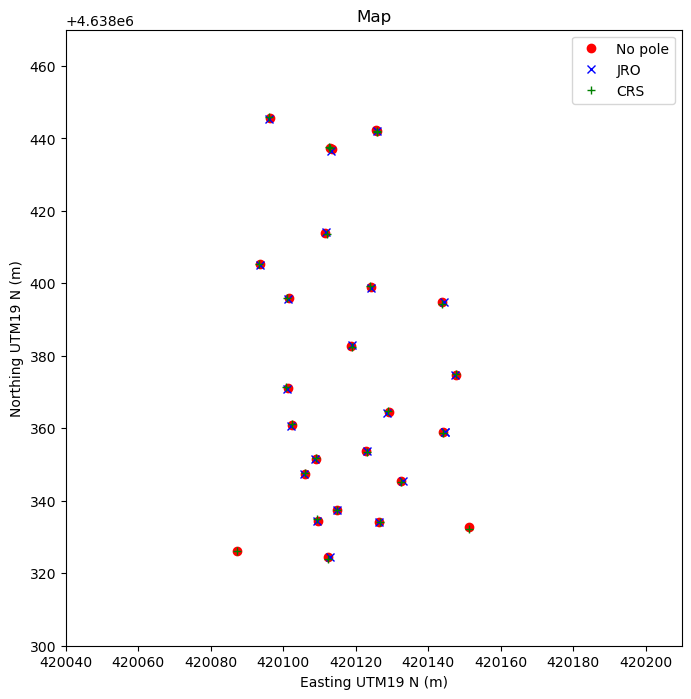

In [10]:
# Calculate the horizontal shift, assuming prior offset was calculated using antenna height (ah) of 0.134
# and new antenna height = pole length (p) plus antenna height
df['hshift_CRS'] = (p + ah) * np.sin( np.radians (df['Tilt angle']) ) - ah * np.sin( np.radians( df['Tilt angle'] ) )
dx, dy = xycoord( df['hshift_CRS'], df['Tilt Azimuth']-90 )
df['E new CRS'] = df['Easting']+dx
df['N new CRS'] = df['Northing']+dy

xdiff = df['E new'] - df['E new CRS']
ydiff = df['N new'] - df['N new CRS']

xdiff_nopole = df['Easting']-df['E new CRS']
ydiff_nopole = df['Northing']-df['N new CRS']

print('Mean x difference (JRO - CRS): ', np.nanmean( xdiff ) )
print('Mean y difference (JRO - CRS): ', np.nanmean( ydiff ) )
print('\n')
print('Mean x difference (No pole - CRS): ', np.nanmean( xdiff_nopole ) )
print('Mean y difference (No pole - CRS): ', np.nanmean( ydiff_nopole ) )
print('Max x difference (No pole - CRS): ', np.nanmax( np.abs( xdiff_nopole ) ) )
print('Max y difference (No pole - CRS): ', np.nanmean( np.abs( ydiff_nopole ) ) )

fig, ax = plt.subplots( figsize=(8, 8) )
plt.plot(df['Easting'], df['Northing'],'or', label='No pole')
plt.plot(df['E new'], df['N new'],'xb', label='JRO')
plt.plot(df['E new CRS'], df['N new CRS'],'+g', label='CRS')
plt.xlim([420040, 420040+170])
plt.ylim([4638300, 4638300+170])
ax.set_aspect('equal', adjustable='box')
plt.xlabel( 'Easting UTM19 N (m)')
plt.ylabel( 'Northing UTM19 N (m)')
plt.legend()
plt.title('Map')
plt.show()

In [11]:
# Save is commented out to prevent overwriting
#df.to_csv("2025-11-04_Marconi_Extrinsics_Targets+corrections.csv", index=False)